<a href="https://colab.research.google.com/github/AnshCoderRepo/MovieRecmmendationSampleEDA/blob/main/exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import missingno as msno # to visualize missing value
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/Churn_Modelling_m.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.0,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608.0,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502.0,France,NaN,NaN,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699.0,France,NaN,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850.0,Spain,Female,43.0,2,NaN,1,1,1,79084.10,0


<Axes: >

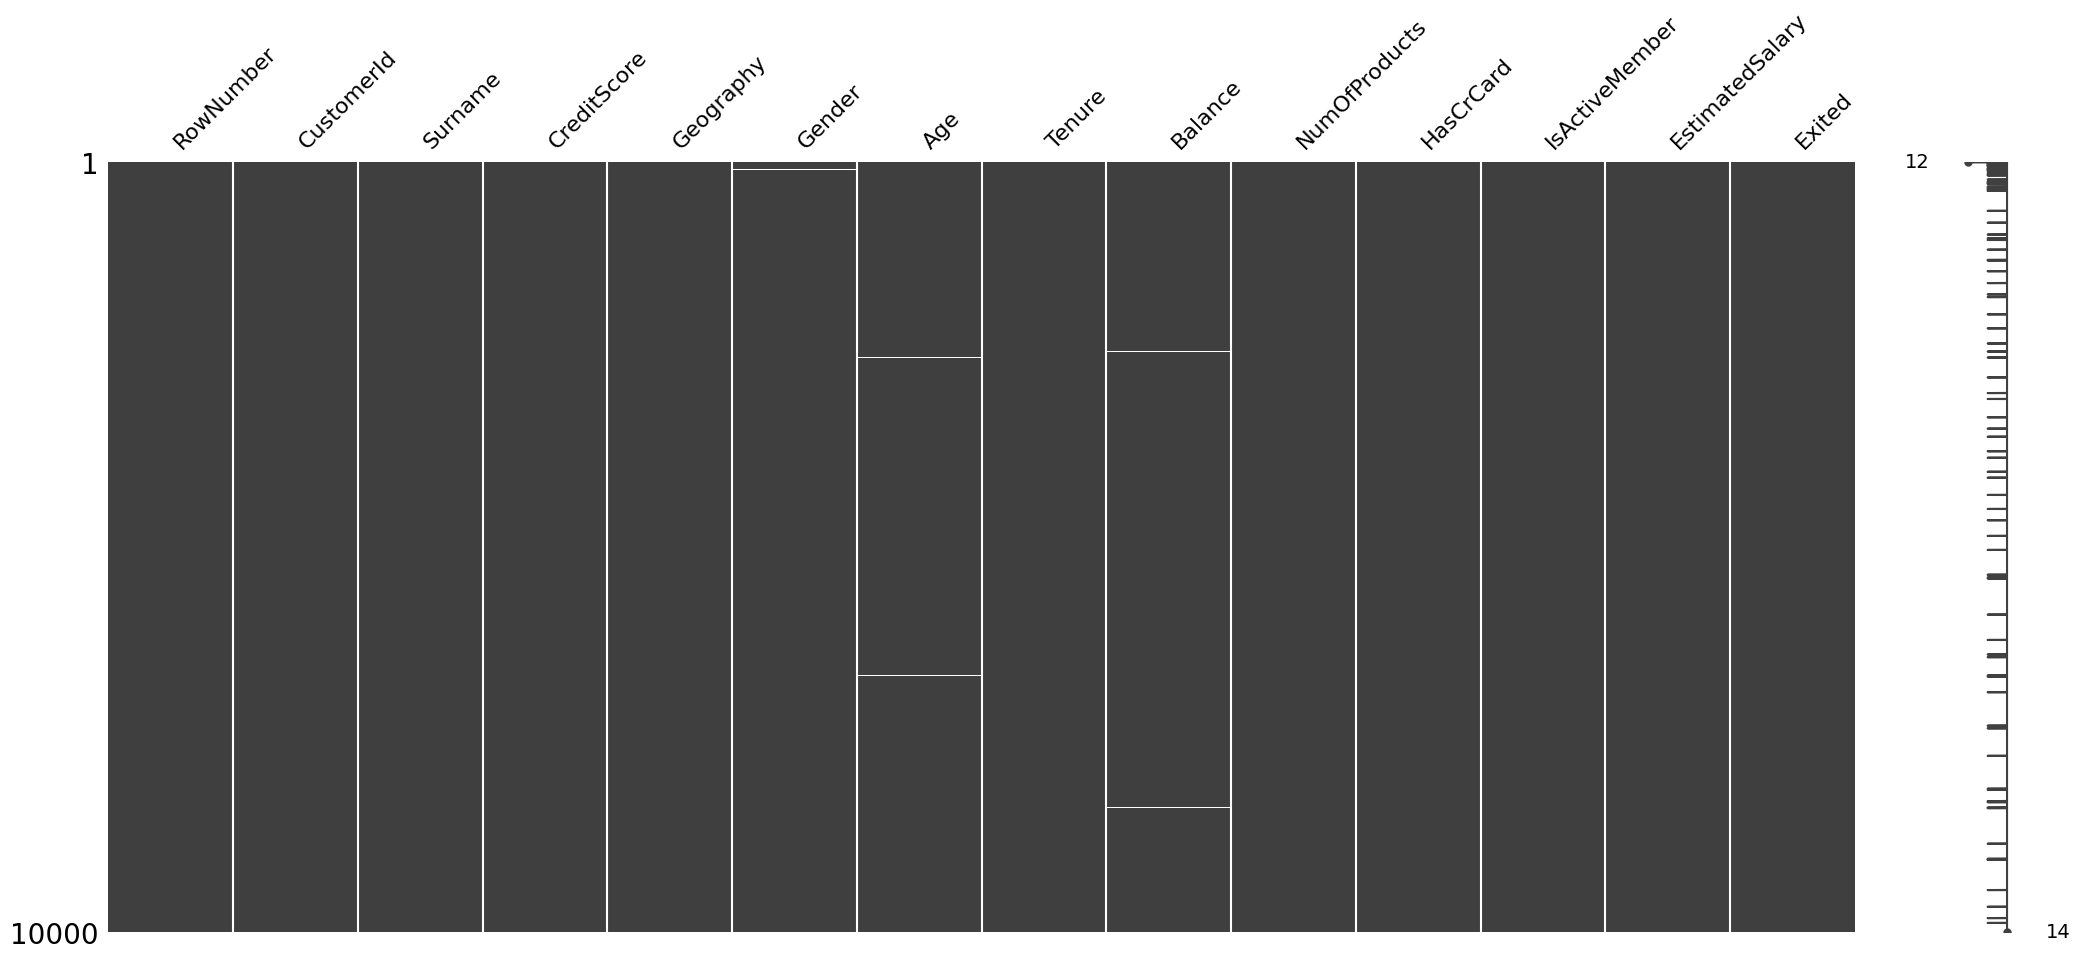

In [ ]:
# visulazie data in marix form  using missingno
msno.matrix(df)

In [ ]:
# prompt: what is the above graph depicting

The above graph is a missing value matrix generated by the missingno library. It provides a visual representation of the missing values in the DataFrame `df`. Each row represents a variable (column) in the DataFrame, and each column represents an observation (row). The color intensity of each cell indicates the proportion of missing values for that variable in that observation.

- Darker cells indicate a higher proportion of missing values, while lighter cells indicate a lower proportion of missing values.
- Missing values are represented by white cells.
- Variables with a high proportion of missing values are clustered together on the left side of the matrix, while variables with a low proportion of missing values are clustered together on the right side of the matrix.
- Observations with a high proportion of missing values are clustered together at the bottom of the matrix, while observations with a low proportion of missing values are clustered together at the top of the matrix.

This visualization helps to identify variables and observations with missing values, as well as the pattern of missing values in the DataFrame.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      9999 non-null   float64
 4   Geography        10000 non-null  object 
 5   Gender           9986 non-null   object 
 6   Age              9960 non-null   float64
 7   Tenure           10000 non-null  int64  
 8   Balance          9963 non-null   float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  9999 non-null   float64
 13  Exited           10000 non-null  int64  
dtypes: float64(4), int64(7), object(3)
memory usage: 1.1+ MB


<Axes: >

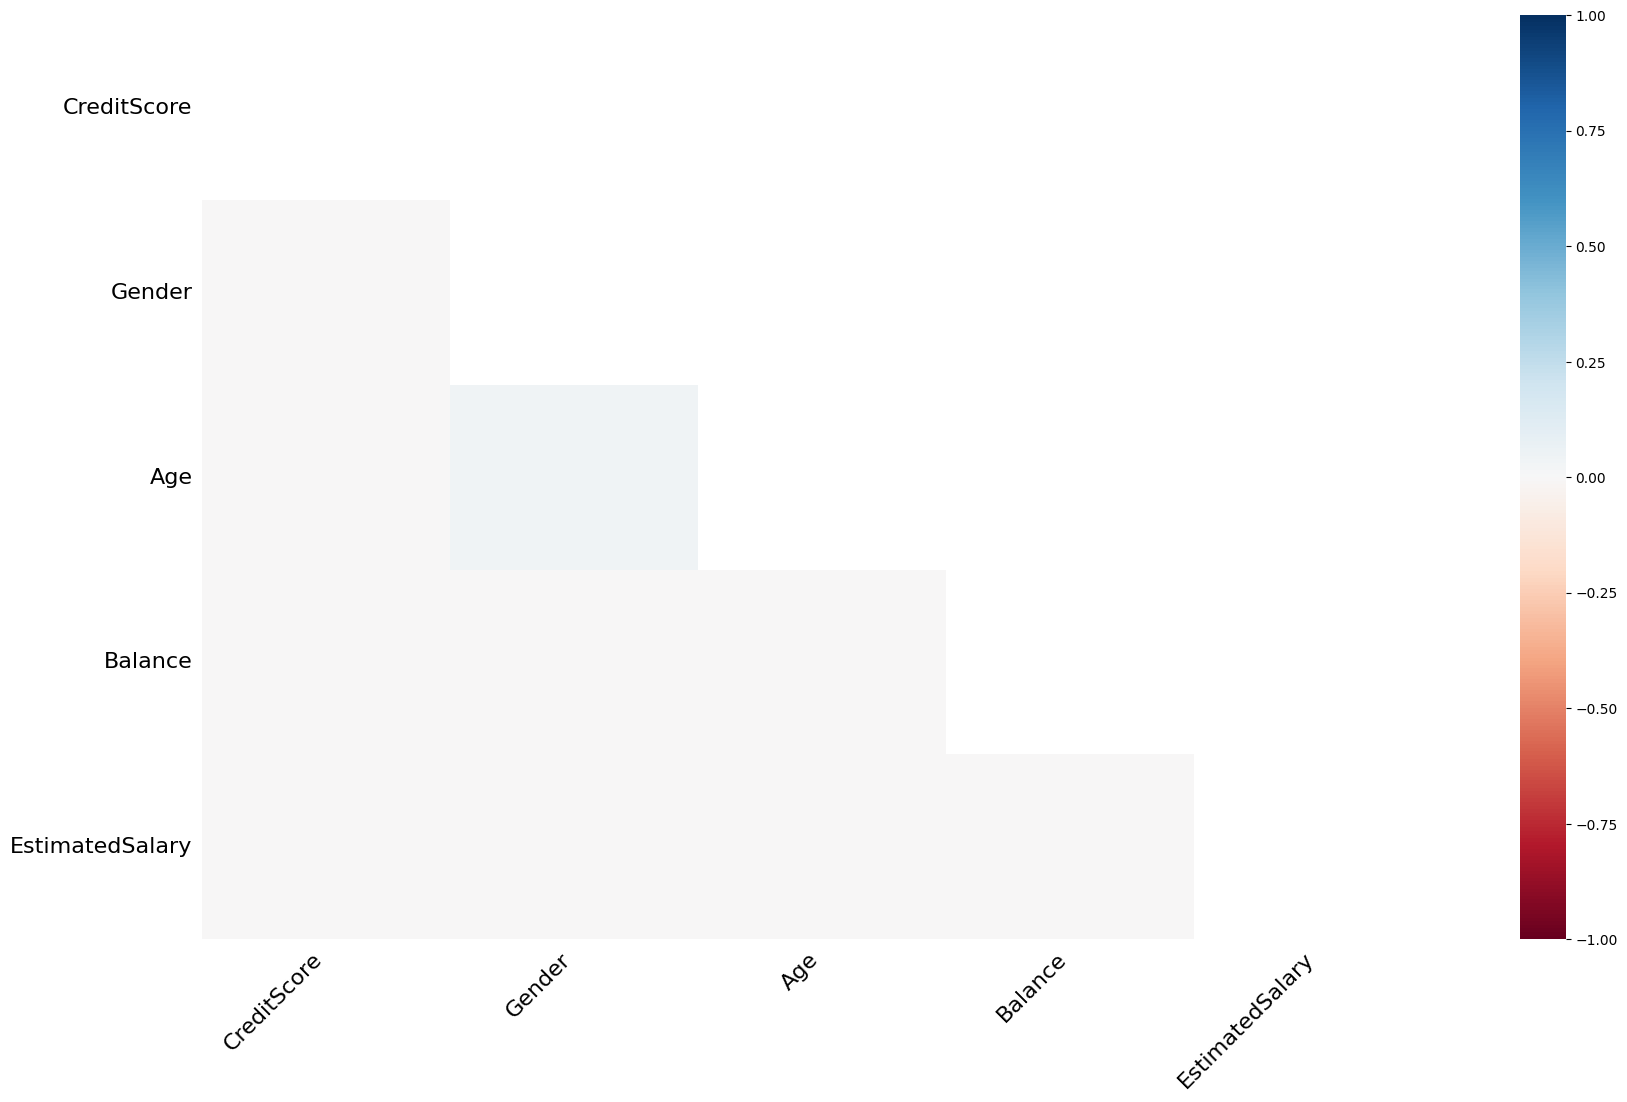

In [ ]:
msno.heatmap(df)

In [ ]:
# from datatile.summary.df import DataFrameSummary
# dfs= DataFrameSummary(df)
# dfs.columns_stats

In [ ]:
# Drop rows that contain missing values in Age
df[df['Age'].notnull()].head()



,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.0,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608.0,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
3,4,15701354,Boni,699.0,France,NaN,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850.0,Spain,Female,43.0,2,NaN,1,1,1,79084.10,0
5,6,15574012,Chu,645.0,Spain,Male,44.0,8,113755.78,2,1,0,NaN,1


In [ ]:
#Drop rows that contain missing values in Age or Balance

df_app1=df[(df['Age'].notnull()) & df['Balance'].notnull()]
df_app1.shape


(9923, 14)

In [ ]:
# Fill all NA with 0
df["Balance_0"] = df["Balance"].fillna(0)
df[["Surname", "CreditScore", "Geography", "Gender", "Age", "Tenure", "Balance", "Balance_0"]].head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Balance_0
0,Hargrave,619.0,France,Female,42.0,2,0.00,0.00
1,Hill,608.0,Spain,Female,41.0,1,83807.86,83807.86
2,Onio,502.0,France,NaN,NaN,8,159660.80,159660.80
3,Boni,699.0,France,NaN,39.0,1,0.00,0.00
4,Mitchell,850.0,Spain,Female,43.0,2,NaN,0.00


In [ ]:
#Second Example

In [ ]:
import pandas as pd
import numpy as np

data = {
    'School ID': [101, 102, 103, np.nan, 105, 106, 107, 108],
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva', 'Frank', 'Grace', 'Henry'],
    'Address': ['123 Main St', '456 Oak Ave', '789 Pine Ln', '101 Elm St', np.nan, '222 Maple Rd', '444 Cedar Blvd', '555 Birch Dr'],
    'City': ['Los Angeles', 'New York', 'Houston', 'Los Angeles', 'Miami', np.nan, 'Houston', 'New York'],
    'Subject': ['Math', 'English', 'Science', 'Math', 'History', 'Math', 'Science', 'English'],
    'Marks': [85, 92, 78, 89, np.nan, 95, 80, 88],
    'Rank': [2, 1, 4, 3, 8, 1, np.nan, 3],
    'Grade': ['B', 'A', 'C', 'B', 'D', 'A', 'C', 'B']
}


df=pd.DataFrame(data)
print("Sample DataFrame :")
print(df)

Sample DataFrame :
   School ID     Name         Address         City  Subject  Marks  Rank Grade
0      101.0    Alice     123 Main St  Los Angeles     Math   85.0   2.0     B
1      102.0      Bob     456 Oak Ave     New York  English   92.0   1.0     A
2      103.0  Charlie     789 Pine Ln      Houston  Science   78.0   4.0     C
3        NaN    David      101 Elm St  Los Angeles     Math   89.0   3.0     B
4      105.0      Eva             NaN        Miami  History    NaN   8.0     D
5      106.0    Frank    222 Maple Rd          NaN     Math   95.0   1.0     A
6      107.0    Grace  444 Cedar Blvd      Houston  Science   80.0   NaN     C
7      108.0    Henry    555 Birch Dr     New York  English   88.0   3.0     B


In [ ]:
#droping missing values using dropna method in python

df_cleaned=df.dropna()
print("\n DataFrame after removing rows with the missing valuse")
print(df_cleaned)


 DataFrame after removing rows with the missing valuse
   School ID     Name       Address         City  Subject  Marks  Rank Grade
0      101.0    Alice   123 Main St  Los Angeles     Math   85.0   2.0     B
1      102.0      Bob   456 Oak Ave     New York  English   92.0   1.0     A
2      103.0  Charlie   789 Pine Ln      Houston  Science   78.0   4.0     C
7      108.0    Henry  555 Birch Dr     New York  English   88.0   3.0     B


In [ ]:
# imputation Methods
# mean , median and mode

mean_imputation =df['Rank'].fillna(df['Rank'].mean())
# Marks column ke mean ko replace kro marks ke missing value se
median_imputation=df['School ID'].fillna(df['School ID'].median())
mode_imputation=df['Marks'].fillna(df['Marks'].mode().iloc[0])

print("\nImplemenet using Means :")
print(mean_imputation)

print("\n Implementaton using median :")
print(median_imputation)

print("\n Implementation usind mode  :")
print(mode_imputation)




Implemenet using Means :
0    2.000000
1    1.000000
2    4.000000
3    3.000000
4    8.000000
5    1.000000
6    3.142857
7    3.000000
Name: Rank, dtype: float64

 Implementaton using median :
0    101.0
1    102.0
2    103.0
3    105.0
4    105.0
5    106.0
6    107.0
7    108.0
Name: School ID, dtype: float64

 Implementation usind mode  :
0    85.0
1    92.0
2    78.0
3    89.0
4    78.0
5    95.0
6    80.0
7    88.0
Name: Marks, dtype: float64


In [ ]:
# froward and backward fill

forward_fill=df['Rank'].fillna(method='ffill')
backward_fill=df['Marks'].fillna(method='bfill')

print("\n forwad fill")
print(forward_fill)

print("\n bakward fill")
print(backward_fill)


 forwad fill
0    2.0
1    1.0
2    4.0
3    3.0
4    8.0
5    1.0
6    1.0
7    3.0
Name: Rank, dtype: float64

 bakward fill
0    85.0
1    92.0
2    78.0
3    89.0
4    95.0
5    95.0
6    80.0
7    88.0
Name: Marks, dtype: float64


In [ ]:
# interpolation Technique

linear_interpolation=df['Marks'].interpolate(method='linear')
quadratic_interpolation=df['Marks'].interpolate(method='quadratic')

print("\n Linear Interpolation :")
print(linear_interpolation)

print("\n Quadractic Interpolation :")
print(quadratic_interpolation)


 Linear Interpolation :
0    85.0
1    92.0
2    78.0
3    89.0
4    92.0
5    95.0
6    80.0
7    88.0
Name: Marks, dtype: float64

 Quadractic Interpolation :
0    85.00000
1    92.00000
2    78.00000
3    89.00000
4    98.28024
5    95.00000
6    80.00000
7    88.00000
Name: Marks, dtype: float64


In [ ]:
# KNN Imputation

from numpy import isnan
from pandas import read_csv
from sklearn.impute import KNNImputer
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/horse-colic.csv',header=None, na_values='?')
print(df.head())

    0   1        2     3      4     5    6    7    8    9   ...    18    19  \
0  2.0   1   530101  38.5   66.0  28.0  3.0  3.0  NaN  2.0  ...  45.0   8.4   
1  1.0   1   534817  39.2   88.0  20.0  NaN  NaN  4.0  1.0  ...  50.0  85.0   
2  2.0   1   530334  38.3   40.0  24.0  1.0  1.0  3.0  1.0  ...  33.0   6.7   
3  1.0   9  5290409  39.1  164.0  84.0  4.0  1.0  6.0  2.0  ...  48.0   7.2   
4  2.0   1   530255  37.3  104.0  35.0  NaN  NaN  6.0  2.0  ...  74.0   7.4   

    20   21   22  23     24  25  26  27  
0  NaN  NaN  2.0   2  11300   0   0   2  
1  2.0  2.0  3.0   2   2208   0   0   2  
2  NaN  NaN  1.0   2      0   0   0   1  
3  3.0  5.3  2.0   1   2208   0   0   1  
4  NaN  NaN  2.0   2   4300   0   0   2  

[5 rows x 28 columns]


In [ ]:
# Summarize the number of rows with the missing values for columns

for i in range(df.shape[1]):
    #count number of rows with the missing values
    n_miss=df[[i]].isnull().sum()
    per=n_miss/df.shape[0]*100
    print('> %d, Missing : %d(%.1f%%)'%(i,n_miss,per))

> 0, Missing : 1(0.3%)
> 1, Missing : 0(0.0%)
> 2, Missing : 0(0.0%)
> 3, Missing : 60(20.0%)
> 4, Missing : 24(8.0%)
> 5, Missing : 58(19.3%)
> 6, Missing : 56(18.7%)
> 7, Missing : 69(23.0%)
> 8, Missing : 47(15.7%)
> 9, Missing : 32(10.7%)
> 10, Missing : 55(18.3%)
> 11, Missing : 44(14.7%)
> 12, Missing : 56(18.7%)
> 13, Missing : 104(34.7%)
> 14, Missing : 106(35.3%)
> 15, Missing : 247(82.3%)
> 16, Missing : 102(34.0%)
> 17, Missing : 118(39.3%)
> 18, Missing : 29(9.7%)
> 19, Missing : 33(11.0%)
> 20, Missing : 165(55.0%)
> 21, Missing : 198(66.0%)
> 22, Missing : 1(0.3%)
> 23, Missing : 0(0.0%)
> 24, Missing : 0(0.0%)
> 25, Missing : 0(0.0%)
> 26, Missing : 0(0.0%)
> 27, Missing : 0(0.0%)


<ipython-input-16-5c55682ae56f>:7: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print('> %d, Missing : %d(%.1f%%)'%(i,n_miss,per))
<ipython-input-16-5c55682ae56f>:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('> %d, Missing : %d(%.1f%%)'%(i,n_miss,per))
<ipython-input-16-5c55682ae56f>:7: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print('> %d, Missing : %d(%.1f%%)'%(i,n_miss,per))
<ipython-input-16-5c55682ae56f>:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('> %d, Missing : %d(%.1f%%)'%(i,n_miss,per))
<ipython-input-16-5c55682ae56f>:7: FutureWarning: Calling int on a single element Se

In [ ]:
imputer =KNNImputer(n_neighbors=5,weights='uniform',metric='non_eculdean')

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import nan_euclidean_distances

X=[[3,np.nan,5]]
Y=[[1,0,0]]

nan_euclidean_distances(X,Y)

array([[6.59545298]])

In [ ]:
X=[[3,np.nan,5],[1,0,0]]
nan_euclidean_distances(X,X)

array([[0.        , 6.59545298],
       [6.59545298, 0.        ]])

In [ ]:
from sklearn.impute import KNNImputer
import numpy as np
X = [ [3, np.NaN, 5], [1, 0, 0], [3, 3, 3] ]
print("X:" ,X)
print("=====")

X: [[3, nan, 5], [1, 0, 0], [3, 3, 3]]
=====


In [ ]:
imputer =KNNImputer(n_neighbors=1)
impute_with_1=imputer.fit_transform(X)

In [ ]:
print("\n Impute with 1 Neighor: \n", impute_with_1)


 Impute with 1 Neighor: 
 [[3. 3. 5.]
 [1. 0. 0.]
 [3. 3. 3.]]


In [ ]:
imputer =KNNImputer(n_neighbors=2)
impute_with_2= imputer.fit_transform(X)

print("\n Impute with 2 Neighbour :", impute_with_2)


 Impute with 2 Neighbour : [[3.  1.5 5. ]
 [1.  0.  0. ]
 [3.  3.  3. ]]


In [ ]:
import pandas as pd

data=pd.read_csv('horse-colic.csv')
df.head(5)

,Age,Weight,BloodPressure,Height
0,25.0,70.0,120.0,165.0
1,30.0,75.0,NaN,170.0
2,35.0,NaN,130.0,180.0
3,40.0,85.0,NaN,NaN
4,NaN,90.0,140.0,190.0


In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LinearRegression

# Create a sample dataset with missing values
data = {
    'Age': [25, 30, 35, 40, np.nan, 50],
    'Weight': [70, 75, np.nan, 85, 90, 95],
    'BloodPressure': [120, np.nan, 130, np.nan, 140, np.nan],
    'Height':[165,170,180,np.nan,190,130]
}

df = pd.DataFrame(data)

# Identify rows with missing values
missing_rows = df[df.isnull().any(axis=1)]

# Define the number of nearest neighbors (K) to consider
K = 2

# Fit a Nearest Neighbors model
nn_model = NearestNeighbors(n_neighbors=K)
nn_model.fit(df.dropna())

# Impute missing values using Predictive Mean Matching
for idx, row in missing_rows.iterrows():
    # Find the nearest neighbors for the row with missing values
    distances, indices = nn_model.kneighbors(row.dropna().values.reshape(1, -1))

    # Extract the nearest neighbors' indices
    nn_indices = indices.flatten()

    # Create a subset of the dataset containing only nearest neighbors
    nearest_neighbors = df.iloc[nn_indices]

    # Fit a linear regression model using nearest neighbors
    lr_model = LinearRegression()
    lr_model.fit(nearest_neighbors.dropna(axis=0).drop(columns=['BloodPressure']),
                 nearest_neighbors['BloodPressure'].dropna())

    # Predict the missing blood pressure value
    predicted_bp = lr_model.predict(np.array(row.drop('BloodPressure')).reshape(1, -1))

    # Find the observed blood pressure value closest to the predicted value
    closest_observed_bp = nearest_neighbors['BloodPressure'].iloc[np.argmin(np.abs(predicted_bp -
                                                                                      lr_model.predict(
                                                                                          nearest_neighbors.dropna(axis=0)
                                                                                                           .drop(columns=['BloodPressure']))))]

    # Impute the missing blood pressure value with the closest observed value
    df.loc[idx, 'BloodPressure'] = closest_observed_bp

print("Imputed Dataset:")
print(df)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


ValueError: X has 3 features, but NearestNeighbors is expecting 4 features as input.